# Humboldt University Project
## *Electronic Publishing and Digital Storytelling Exam (DHDK Master Degree)*

### A Project by Centrone Gemma, Genovese Francesca, Moretti Arianna

## __STEP 0__ : The choice of the university

In [133]:
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS

wd = Namespace("http://www.wikidata.org/entity/")
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")
xs = Namespace("http://www.w3.org/2001/XMLSchema#")

g = rdflib.ConjunctiveGraph()

result = g.parse("artchives_output.nq", format='nquads')



### version 1

In [134]:
#Selection of all the named entities that contain the string "University" in the object of a triple with predicate "rdfs:label"
query_results = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT ?entity ?string
WHERE {
?entity rdfs:label ?string.
}
""")


In [135]:
#Creation of a dictionaru with all these universities, where the key is the wikidata code associated to them, while the value is a list of values, the first of which is a string with the name of the university
university_dict= {}
for query_res in query_results:
    if "entity" in str(query_res[0]):
        if "University" in str(query_res[1]):
            a = query_res[0].lstrip()
            a = a[31:]
            university_dict[a] = [str(query_res[1]).lstrip().lower()]

print(university_dict)
            

{'Q875788': ['university of innsbruck'], 'Q165980': ['university of vienna'], 'Q1360303': ['university of kentucky'], 'Q155354': ['university of marburg'], 'Q21578': ['princeton university'], 'Q49088': ['columbia university'], 'Q170027': ['university of london'], 'Q152087': ['humboldt university of berlin'], 'Q317053': ['university of giessen'], 'Q213439': ['university of virginia'], 'Q157575': ['university of strasbourg'], 'Q35794': ['university of cambridge'], 'Q3339070': ['new york university institute of fine arts'], 'Q156725': ['university of hamburg'], 'Q159895': ['university of rostock'], 'Q1031803': ['tor vergata university of rome'], 'Q49210': ['new york university'], 'Q49117': ['university of pennsylvania'], 'Q820887': ['university of florence'], 'Q151510': ['heidelberg university'], 'Q34433': ['university of oxford'], 'Q13371': ['harvard university'], 'Q152171': ['university of bonn'], 'Q230899': ['university of manchester'], 'Q131252': ['university of chicago'], 'Q223429': 

In [136]:
#Extraction of all the universities where people either studied (p69) or worked (p108) or with whom they had a generic relation (p921)
query_results0 = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT distinct ?uni ?uni_name ?s ?s_name
WHERE {
?s rdf:type wd:Q5;
rdfs:label ?s_name;
?p ?uni.
FILTER (?p = wdt:P69 || ?p = wdt:P108).
?uni rdfs:label ?uni_name.
}
""")


In [137]:
#Creation of a second dictionary with the same structure as the previous one, in order to store results of this second query
university_dict0= {}
for query_res in query_results0:
    a = query_res[0].lstrip()
    a = a[31:]
    university_dict0[a] = [str(query_res[1]).lstrip().lower()]    
print(university_dict0)

{'Q1031803': ['tor vergata university of rome'], 'Q593321': ['university of genoa'], 'Q2093794': ['vassar college'], 'Q154804': ['leipzig university'], 'Q49088': ['columbia university'], 'Q167733': ['barnard college'], 'Q49210': ['new york university'], 'Q153987': ['university of freiburg'], 'Q209344': ['sapienza university of rome'], 'Q156725': ['university of hamburg'], 'Q152171': ['university of bonn'], 'Q3339070': ['new york university institute of fine arts'], 'Q1399299': ['slade school of fine art'], 'Q49117': ['university of pennsylvania'], 'Q13371': ['harvard university'], 'Q1446181': ['hunter college'], 'Q1360303': ['university of kentucky'], 'Q155354': ['university of marburg'], 'Q152087': ['humboldt university of berlin'], 'Q32120': ['university of halle-wittenberg'], 'Q55044': ['ludwig maximilian university of munich'], 'Q3558578': ['villa i tatti'], 'Q359047': ['bernard berenson'], 'Q820887': ['university of florence'], 'Q503176': ["christie's"], 'Q5303281': ['downside sch

In [138]:
#Update of the second dictionary with the first one, so to obtain a whole unique dictionary, containing both the study centres included in both dictionaries and the ones contained either in the one or in the other
university_dict0.update(university_dict)
print(university_dict0)

{'Q1031803': ['tor vergata university of rome'], 'Q593321': ['university of genoa'], 'Q2093794': ['vassar college'], 'Q154804': ['leipzig university'], 'Q49088': ['columbia university'], 'Q167733': ['barnard college'], 'Q49210': ['new york university'], 'Q153987': ['university of freiburg'], 'Q209344': ['sapienza university of rome'], 'Q156725': ['university of hamburg'], 'Q152171': ['university of bonn'], 'Q3339070': ['new york university institute of fine arts'], 'Q1399299': ['slade school of fine art'], 'Q49117': ['university of pennsylvania'], 'Q13371': ['harvard university'], 'Q1446181': ['hunter college'], 'Q1360303': ['university of kentucky'], 'Q155354': ['university of marburg'], 'Q152087': ['humboldt university of berlin'], 'Q32120': ['university of halle-wittenberg'], 'Q55044': ['ludwig maximilian university of munich'], 'Q3558578': ['villa i tatti'], 'Q359047': ['bernard berenson'], 'Q820887': ['university of florence'], 'Q503176': ["christie's"], 'Q5303281': ['downside sch

In [139]:
#Count of total occurrences of each one of the universities (or centres of studies) each university in our dataset
with open("artchives_output.nq", "r", encoding="utf8") as myfile:
    data = myfile.read().splitlines()
    print(data)

['<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <http://www.wikidata.org/prop/direct/P921> <http://www.wikidata.org/entity/Q5664> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <https://w3id.org/artchives/hasScopeAndContentSubject> <http://www.wikidata.org/entity/Q1404472> <https://w3id.org/artchives/1559665347-15/> .', '<http://www.wikidata.org/entity/Q49135> <http://www.w3.org/2000/01/rdf-schema#label> "              Isabella Stewart Gardner Museum"^^<http://www.w3.org/2001/XMLSchema#string> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <https://w3id.org/artchives/hasScopeAndContentSubject> <http://www.wikidata.org/entity/Q537874> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <http://www.wikidata.org/prop/direct/P921> <http://www.wikidata.org/entity/Q537874> <https://w3

In [140]:
# Inclusion of the datum about the overall occurrences of each institute as the second element of the value (a list) of eack k,v pair in the updated dictionary
# The dictionary is then ordered according to the number of occurrences of each element of the dictionary in the dataset (from the most to the least occurrent)
# The Humboldt results to be the one with most occurrences.
# Since the number of elements in the dictionary was too high to be visualized properly, we excluded the centers of studies with less then 5 occurrences in the database, considering them not really relevant.
for k in university_dict0:
    count = 0
    for l in data:
        if str(k) in l:
            count += 1
    university_dict0[k].append(count)
    
from collections import OrderedDict
oredered_university_dict0 = dict(sorted(university_dict0.items(), key=lambda item: (item[1])[1], reverse=True))

to_be_deleted=[]
for k,v in oredered_university_dict0.items():
    if v[1] <= 5:
        to_be_deleted.append(k)
for i in to_be_deleted:
    del oredered_university_dict0[i]

print(oredered_university_dict0)

{'Q152087': ['humboldt university of berlin', 18], 'Q55044': ['ludwig maximilian university of munich', 17], 'Q49210': ['new york university', 13], 'Q13371': ['harvard university', 11], 'Q359047': ['bernard berenson', 10], 'Q155354': ['university of marburg', 9], 'Q2093794': ['vassar college', 8], 'Q49088': ['columbia university', 8], 'Q209344': ['sapienza university of rome', 8], 'Q3558578': ['villa i tatti', 8], 'Q503176': ["christie's", 8], 'Q153987': ['university of freiburg', 7], 'Q152171': ['university of bonn', 7], 'Q3339070': ['new york university institute of fine arts', 7], 'Q35794': ['university of cambridge', 7], 'Q213439': ['university of virginia', 7], 'Q1031803': ['tor vergata university of rome', 6], 'Q593321': ['university of genoa', 6], 'Q154804': ['leipzig university', 6], 'Q156725': ['university of hamburg', 6], 'Q1399299': ['slade school of fine art', 6], 'Q1360303': ['university of kentucky', 6], 'Q820887': ['university of florence', 6], 'Q805285': ['balliol colle

(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:34: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



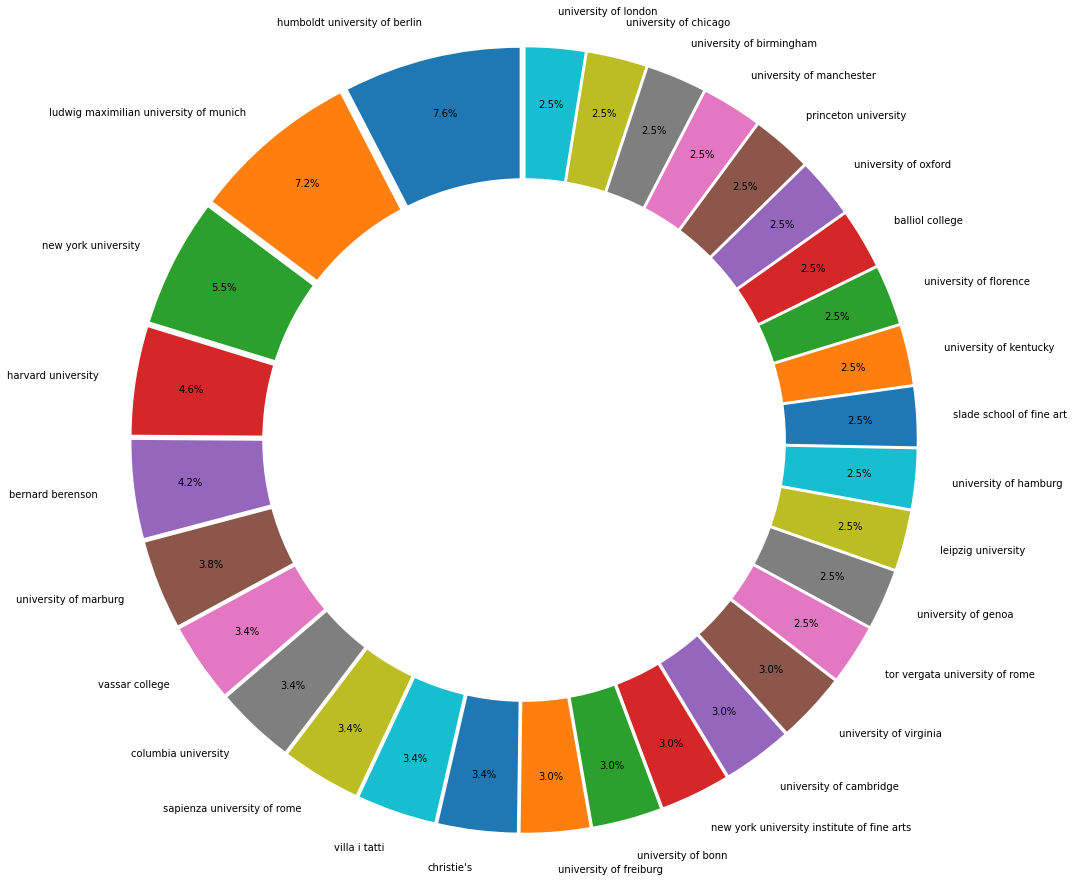

In [141]:
#Visualization of occurrences of universities (in percentage) in a piechart

l = len(oredered_university_dict0)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in oredered_university_dict0.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

In [142]:
query_results7 = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT distinct ?s ?name ?uni ?uni_name ?uni ?country ?country_name
WHERE {
?s rdf:type wd:Q5;
rdfs:label ?name ;
?p ?uni.
FILTER (?p = wdt:P69 || ?p = wdt:P108 || ?p = wdt:P921).
?uni rdfs:label ?uni_name;
wdt:P17 ?country.
?country rdfs:label ?country_name.
}
""")


In [143]:
#Check of the extracted data
query_set7=set()
for q in query_results7:
    query_set7.add(q)

for q in query_set7:
    print(q[1].lstrip(), "has a link with the university: ", q[3].lstrip(), "located in ", q[6].lstrip())


Julius S. Held has a link with the university:  Barnard College located in  United States of America
Richard Krautheimer has a link with the university:  Ludwig Maximilian University of Munich located in  Germany
Aby Warburg has a link with the university:  Humboldt University of Berlin located in  Germany
Ulrich Middeldorf has a link with the university:  Humboldt University of Berlin located in  Germany
Federico Zeri has a link with the university:  Sapienza University of Rome located in  Italy
John Pope-Hennessy has a link with the university:  University of Cambridge located in  United Kingdom
Eugenio Battisti has a link with the university:  University of Genoa located in  Italy
Ernst Kitzinger has a link with the university:  University of Cambridge located in  United Kingdom
Ellis Waterhouse has a link with the university:  Marlborough College located in  United Kingdom
Leo Steinberg has a link with the university:  University of Pennsylvania located in  United States of America

In [144]:
#Integration in the previous dictionary of the set of poeple having a connection with the university
for k,v in oredered_university_dict0.items():
    if len(v) >= 3:
        pass
    else:
        v.append(set())
        for q in query_set7:
            if k == q[2][31:]:
                v[2].add(q[1].lstrip())

for k,v in oredered_university_dict0.items():
    for q in query_set7:
        if k == q[2][31:]:
            if len(v)<4:
                v.append(q[6].lstrip())
    if len(v)<4:
        v.append("-")

print(oredered_university_dict0)
        

{'Q152087': ['humboldt university of berlin', 18, {'Ulrich Middeldorf', 'Kurt Badt', 'Leo Steinberg', 'Werner Cohn', 'Julian Kliemann', 'Aby Warburg', 'Richard Krautheimer'}, 'Germany'], 'Q55044': ['ludwig maximilian university of munich', 17, {'Ulrich Middeldorf', 'Kurt Badt', 'Julian Kliemann', 'Aby Warburg', 'Richard Krautheimer', 'Ernst Kitzinger', 'Otto Lehmann-Brockhaus'}, 'Germany'], 'Q49210': ['new york university', 13, {'John Pope-Hennessy', 'Leo Steinberg', 'Werner Cohn', 'Everett Fahy', 'Richard Krautheimer', 'Julius S. Held'}, 'United States of America'], 'Q13371': ['harvard university', 11, {'Leo Steinberg', 'Ernst Kitzinger', 'Everett Fahy', 'Federico Zeri'}, 'United States of America'], 'Q359047': ['bernard berenson', 10, set(), '-'], 'Q155354': ['university of marburg', 9, {'Otto Lehmann-Brockhaus', 'Richard Krautheimer'}, 'Germany'], 'Q2093794': ['vassar college', 8, {'Richard Krautheimer', 'Wolfgang Lotz'}, 'United States of America'], 'Q49088': ['columbia university'

In [145]:
#Visualization of a table containing data about the universities
for k,v in oredered_university_dict0.items():
    v[2]=list(v[2])
    x = (" - ".join(v[2]))
    v[2] = x

code_list=[]
name_list=[]
occ_list=[]
peop_list=[]
count_list=[]

for k,v in oredered_university_dict0.items():
    code_list.append(k)
    name_list.append(v[0])
    occ_list.append(v[1])
    peop_list.append(v[2])
    count_list.append(v[3])

import plotly.graph_objects as go
import pandas as pd
from plotly.offline import iplot
import plotly.io as pio
import matplotlib.pyplot as plt

colors = ["rgba(232,162,172,255)","rgba(205,53,82,255)","rgba(58,73,194,255)","rgba(43,20,49,255)"]

#in order to multiply the elements of the color palette so to have the list of colors as long as the list of elements to be included in the table
def colors_multiplier (l1, l2):
    while len(l1) < len(l2):
        l1 = (l1)*2
    if len(l1) == len(l2):
        return l1
    else:
        while len(l1)> len(l2):
            l1.pop()
        return(l1)
        
colors2 = (colors_multiplier(colors, oredered_university_dict0))

data = {"Name": name_list, "Code": code_list, "Occurrences": occ_list, "People":peop_list, "Country": count_list, 'Color' : colors2}
df = pd.DataFrame(data)

fig = go.Figure(data=[go.Table(
  header=dict(
    values=["<b>Name</b>","<b>Code</b>", "<b>Occurrences</b>", "<b>People</b>", "<b>Country</b>"],
    line_color='white', fill_color='white',
    align='center', font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[df.Name, df.Code, df.Occurrences, df.People, df.Country],
    line_color=[df.Color], fill_color=[df.Color],
    align='center', font=dict(color='white', size=11)
  ))
])

fig.show()


### version 2

In [146]:
#This is an alternative approach to confirm that the Humboldt's popularity, not only considering its generic occurrences, but also its specific ones. 
#Note: The limit of this approach is that it can't take into account universities that are not classified as such in our dataset.
#In the first of the queries above we extract the entities that can be identified as universities, being objects of triples with predicates wdt:P69 and/or wdt:P108
#The second query is aimed at counting the further occurrences of universities in the dataset, as objects of triples with predicate wdt:P921
query_results5 = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT DISTINCT ?uni (count(distinct ?person) as ?count) ?uni_name
WHERE {
    ?uni rdfs:label ?uni_name.
    ?person ?p ?uni.
    FILTER (?p = wdt:P69 || ?p = wdt:P108).
}

GROUP BY ?count ?uni ?uni_name
ORDER BY ?count ?uni_name
""")

query_results3 = g.query(
    """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX xs: <http://www.w3.org/2001/XMLSchema#>
SELECT ?uni (count(distinct ?person) as ?count) ?uni_name
WHERE {
    ?uni rdfs:label ?uni_name.
    ?person wdt:P921 ?uni.
}

GROUP BY ?count ?uni ?uni_name
ORDER BY ?count ?uni_name
""")

query_set0 = set()
for query_res in query_results5:
    query_set0.add(query_res)
    
nw_count_dict={}
for q in query_set0:
    x = (str(q[0]))[31:]
    nw_count_dict[x] = []
    nw_count_dict[x].append(q[2].lstrip().lower())
    nw_count_dict[x].append(int(q[1]))

query_set1 = set()
for query_res in query_results3:
    query_set1.add(query_res)
    
for q in query_set1:
    for k,v in nw_count_dict.items():
        if k in q[0]:
            n = int(q[1])
            v[1] = v[1] + n
    
from collections import OrderedDict
nw_count_dict_ord = dict(sorted(nw_count_dict.items(), key=lambda item: (item[1])[1], reverse=True))

print(nw_count_dict_ord)


{'Q55044': ['ludwig maximilian university of munich', 8], 'Q152087': ['humboldt university of berlin', 8], 'Q49210': ['new york university', 8], 'Q13371': ['harvard university', 6], 'Q359047': ['bernard berenson', 6], 'Q3558578': ['villa i tatti', 4], 'Q49088': ['columbia university', 3], 'Q153987': ['university of freiburg', 3], 'Q131252': ['university of chicago', 2], 'Q213439': ['university of virginia', 2], 'Q209344': ['sapienza university of rome', 2], 'Q35794': ['university of cambridge', 2], 'Q503176': ["christie's", 2], 'Q2093794': ['vassar college', 2], 'Q3339070': ['new york university institute of fine arts', 2], 'Q1399299': ['slade school of fine art', 2], 'Q154804': ['leipzig university', 2], 'Q152171': ['university of bonn', 2], 'Q155354': ['university of marburg', 2], 'Q167733': ['barnard college', 2], 'Q593321': ['university of genoa', 1], 'Q223429': ['university of birmingham', 1], 'Q49117': ['university of pennsylvania', 1], 'Q34433': ['university of oxford', 1], 'Q80

(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:41: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



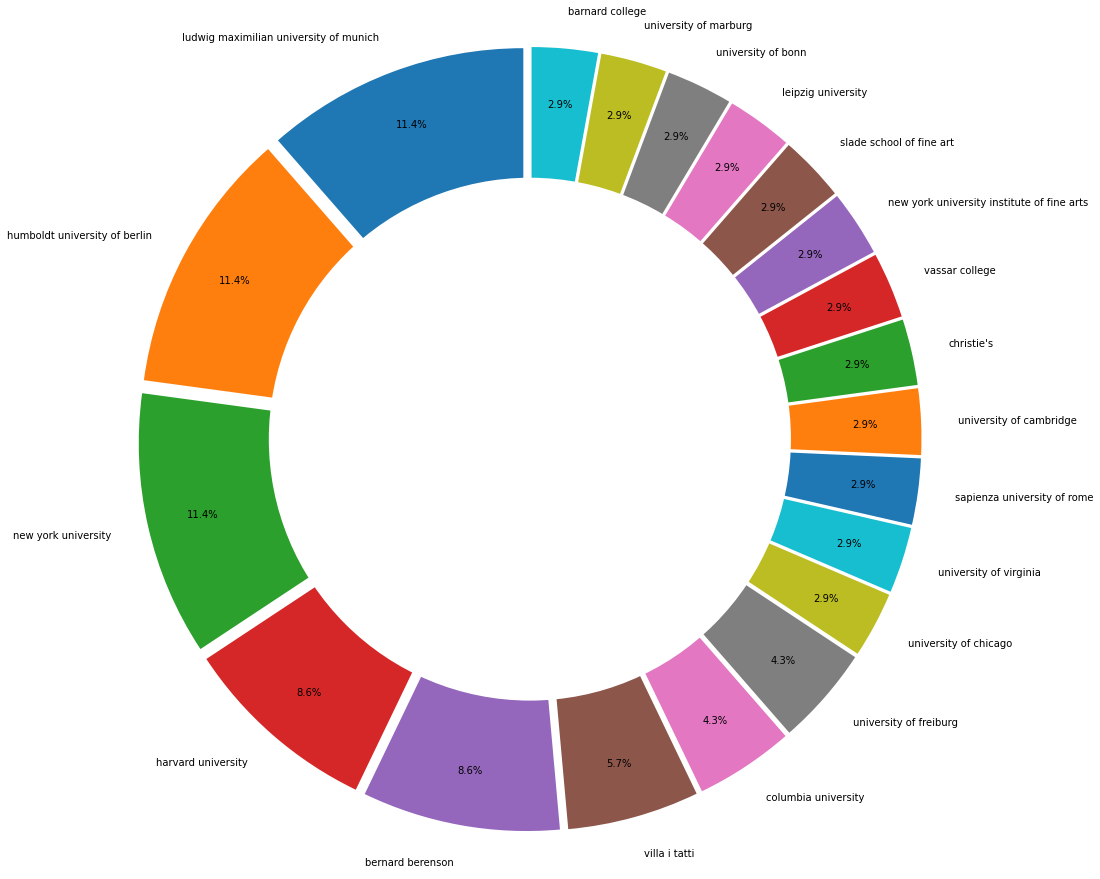

In [147]:
#Visualization of occurrences (in percentage) - in this case, universities with specific occurrences lower than 1 were not included in the visualization

to_be_deleted=[]
for k,v in nw_count_dict_ord.items():
    if v[1] <= 1:
        to_be_deleted.append(k)
for i in to_be_deleted:
    del nw_count_dict_ord[i]

l = len(nw_count_dict_ord)
import matplotlib.pyplot as plt

# Data to plot
labels = []
sizes = []


a = 0.05
explode_list = []
for i in range(l):
    explode_list.append(a)

explode=tuple(explode_list)
print(explode)
    
fig = plt.figure(1, figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for x, y in nw_count_dict_ord.items():
    labels.append(y[0])
    sizes.append(y[1])

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

## __STEP 1__ : People with connection with the chosen university

In [148]:
from six import string_types


In [149]:
#Extraction of some biographical data related to the scholars/experts connected with the chosen university
query_results= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT ?person ?name ?birth_date ?death_date ?citiz_name
WHERE {
?person rdf:type wd:Q5 ;
rdfs:label ?name ;
wdt:P921 wd:Q152087;
wdt:P569 ?birth_date;
wdt:P570 ?death_date;
wdt:P27 ?citiz .
?citiz rdfs:label ?citiz_name
}
 
""")

In [150]:
#Creation of a dictionary with biographical information just retrieved
biodict={}
for query in query_results:
    biodict[str(query[0])[31:]] = [str(query[1]).lstrip(), str(query[2]).lstrip()[:4], str(query[3]).lstrip()[:4], str(query[4]).lstrip(), [], []]

print(biodict)

{'Q18935222': ['Werner Cohn', '1905', '1960', 'Germany', [], []], 'Q85761254': ['Julian Kliemann', '1949', '2015', 'Germany', [], []], 'Q60185': ['Aby Warburg', '1866', '1929', 'Germany', [], []], 'Q457739': ['Leo Steinberg', '1920', '2011', 'Russia', [], []], 'Q90407': ['Richard Krautheimer', '1897', '1994', 'Germany', [], []], 'Q1715096': ['Ulrich Middeldorf', '1901', '1983', 'Germany', [], []], 'Q1629748': ['Kurt Badt', '1890', '1973', 'Germany', [], []]}


In [151]:
#Infmation retrival of data concerning art historians' occupations and collections.

query_results6= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX art: <https://w3id.org/artchives/>
SELECT ?person ?coll_name ?name_occup ?collection
WHERE {
?person rdf:type wd:Q5 ;
rdfs:label ?name ;
wdt:P921 wd:Q152087.
?collection wdt:P170 ?person;
rdfs:label ?coll_name.
?person wdt:P106 ?occup.
?occup rdfs:label ?name_occup.
}

""")


In [152]:
#Inclusion of data concerning occupations and collections in the previously created biodict dictionary
for k,v in biodict.items():
    v[5] = set(v[5])
    v[4] = set(v[4])

for query in query_results6:
    for k,v in biodict.items():
        if query[0].lstrip()[31:] in k:
            (v[4]).add(str(query[2].lstrip().lower()))
            
for query in query_results6:
    for k,v in biodict.items():
        if query[0].lstrip()[31:] in k:
            (v[5]).add(str(query[1].lstrip().lower()))


In [153]:
#Creation and filling of a table displaying information about historians' biographies

for k,v in biodict.items():
    v[4]=list(v[4])
    x = (" - ".join(v[4]))
    v[4] = x
    v[5]=list(v[5])
    y = (" - ".join(v[5]))
    v[5] = y


code_list=[]
name_list=[]
birth_list=[]
death_list=[]
citiz_list=[]
jobset_list=[]
collectionset_list=[]

occurrences_list=[]
for k,v in biodict.items():
    code_list.append(k)
    name_list.append(v[0])
    birth_list.append(v[1])
    death_list.append(v[2])
    citiz_list.append(v[3])
    jobset_list.append(v[4])
    collectionset_list.append(v[5])
    

colors = ["rgba(232,162,172,255)","rgba(205,53,82,255)","rgba(58,73,194,255)","rgba(43,20,49,255)"]

def colors_multiplier (l1, l2):
    while len(l1) < len(l2):
        l1 = (l1)*2
    if len(l1) == len(l2):
        return l1
    else:
        while len(l1)> len(l2):
            l1.pop()
        return(l1)
        
colors2 = (colors_multiplier(colors, biodict))

data = {'Name' : name_list, "Code": code_list, "Birth": birth_list, "Death":death_list, "Citizenship": citiz_list, "Roles": jobset_list, "Collections": collectionset_list, 'Color' : colors2}
df = pd.DataFrame(data)

fig = go.Figure(data=[go.Table(
  header=dict(
    values=["<b>Name</b>","<b>Code</b>", "<b>Birth</b>", "<b>Death</b>", "<b>Citizenship</b>", "<b>Roles</b>", "<b>Collections</b>"],
    line_color='white', fill_color='white',
    align='center', font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[df.Name, df.Code, df.Birth, df.Death, df.Citizenship, df.Roles, df.Collections],
    line_color=[df.Color], fill_color=[df.Color],
    align='center', font=dict(color='white', size=11)
  ))
])

fig.show()

In [154]:
#Automatic creation of html files to insert as iframes in the website. BS is used to extract information from Artchives' pages dedicated to each art historian.
 
import requests
from bs4 import BeautifulSoup
import re


def histo_bio (code):
    ur = "http://artchives.fondazionezeri.unibo.it/historian-"
    url = ur+code
    response = requests.get(url)
    #print(response.status_code)
    soup = BeautifulSoup(response.content)
    secTag = soup.find_all("section", {"class": "columns"})
    my_text=[]
    for tag in secTag:
        pTags = tag.find_all("p")
        for tag in pTags:
            my_text.append(tag.text)
    my_text= " ".join(my_text)
    phrases_list = re.findall("[A-Z].*?[\.!?]", my_text, re.MULTILINE | re.DOTALL )
    #return phrases_list
    l = len(phrases_list)
    first = phrases_list[0]
    last = phrases_list[l-1]
    to_be_returned=[]
    to_be_returned.append(first)
    for i in phrases_list:
        if "University" in i or "Universities" in i or "university" in i or "studied" in i:
            if i != first:
                to_be_returned.append(i)
    if last not in to_be_returned and "Died" in last or "died" in last or "buried" in last:
        to_be_returned.append(last)
    to_html=[]
    for i in to_be_returned:
        to_html.append("<p>" + i +"</p>")
    to_html = " ".join(to_html)
    return to_html


text1 = '''
<html>
    <body>
'''

text2 = '''
    </body>
</html>

'''


for k, v in biodict.items():
    file = open(k + ".html","w")
    file.write(text1 + histo_bio(k) + text2)
    file.close()

## STEP 2: Overlapping between periods of activity

In [155]:
#Visualization of overlapping beteen periods in which art historians lived (as a gantt chart)

import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot

var1="Start"
count1=0
var_name_list=[]
for k,v in biodict.items():
    count1+=1
    varx=var1+str(count1)
    var_name_list.append(varx)

var2="Finish"
count2=0
var_name_list2=[]
for k,v in biodict.items():
    count2+=1
    vary=var2+str(count2)
    var_name_list2.append(vary)

var3="LabelDate"
count3=0
var_name_list3=[]
for k,v in biodict.items():
    count3+=1
    varz=var3+str(count3)
    var_name_list3.append(varz)

or_biodict= (sorted(biodict.items(), key=lambda item: item[1]))

# Bdates
count = 0
for c, v in enumerate(var_name_list):
    globals()[v] = int(or_biodict[c][1][1])
    count += 1

# Ddates
count = 0
for c, v in enumerate(var_name_list2):
    globals()[v] = int(or_biodict[c][1][2])
    count += 1


#
count = 0
for c, v in enumerate(var_name_list3):
    globals()[v] = (or_biodict[c][1][0])
    count += 1

df=[]


for c,v in enumerate(or_biodict):
    data_dict=dict()
    for c2, v2 in enumerate(var_name_list):
        if c2 == c:
            globals()[v2] = int(or_biodict[c][1][1])
            data_dict["Start"]=globals()[v2]
    for c1, v1 in enumerate(var_name_list2):
        if c1 == c:
            globals()[v1] = int(or_biodict[c][1][2])
            data_dict["Finish"]=globals()[v1]
    for c3, v3 in enumerate(var_name_list3):
        if c3 == c:
            globals()[v3] = (or_biodict[c][1][0])
            data_dict["Task"]=globals()[v3]
    df.append(data_dict)


# figure
fig = ff.create_gantt(df)
iplot(fig)


## STEP 3: Themes of research/interest

In [156]:
#Query to extract themes of interest of each historian, passing through his/her collections
query_results_period= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX art: <https://w3id.org/artchives/>
SELECT  ?period ?period_name ?start_time ?end_time ?person
WHERE {

?collection wdt:P170 ?person;
rdfs:label ?coll_name.
?collection art:hasSubjectPeriod ?period.
?period rdfs:label ?period_name;
wdt:P580 ?start_time;
wdt:P582 ?end_time.

}

""")

 
period_dict=dict()
for query in query_results_period:
    period_dict[str(query[0]).lstrip()]= [str(query[1]).lstrip().lower(), query[2], query[3]]

In [157]:
#Creation of a Gantt visualization showing chronological overlappings between periods of interst, following the same process adopted for the creation of the previous Gantt
var1="Start"
count1=0
var_name_list=[]
for k,v in period_dict.items():
    count1+=1
    varx=var1+str(count1)
    var_name_list.append(varx)


var2="Finish"
count2=0
var_name_list2=[]
for k,v in period_dict.items():
    count2+=1
    vary=var2+str(count2)
    var_name_list2.append(vary)

var3="LabelDate"
count3=0
var_name_list3=[]
for k,v in period_dict.items():
    count3+=1
    varz=var3+str(count3)
    var_name_list3.append(varz)


or_period_dict= (sorted(period_dict.items(), key=lambda item: item[1]))

count = 0
for c, v in enumerate(var_name_list):
    globals()[v] = or_period_dict[c][1][1]
    count += 1


# Ddates
count = 0
for c, v in enumerate(var_name_list2):
    globals()[v] = or_period_dict[c][1][2]
    count += 1
#
count = 0
for c, v in enumerate(var_name_list3):
    globals()[v] = (or_period_dict[c][1][0])
    count += 1


df=[]


for c,v in enumerate(or_period_dict):
    data_dict=dict()
    for c2, v2 in enumerate(var_name_list):
        if c2 == c:
            globals()[v2] = or_period_dict[c][1][1]
            data_dict["Start"]=globals()[v2]
    for c1, v1 in enumerate(var_name_list2):
        if c1 == c:
            globals()[v1] = or_period_dict[c][1][2]
            data_dict["Finish"]=globals()[v1]
    for c3, v3 in enumerate(var_name_list3):
        if c3 == c:
            globals()[v3] = (or_period_dict[c][1][0])
            data_dict["Task"]=globals()[v3]
    df.append(data_dict)

# figure
fig = ff.create_gantt(df)
iplot(fig)

In [158]:
#creation and filling of a set, in order to add more information to the biodict previously created.
for k,v in biodict.items():
    v.append(set())
    for q in query_results_period:
        if q[4][31:] in k:
            v[6].add(q[1].lstrip().lower())

In [159]:
#Reuse of a previous query in order to select additional information, that will be used in the creation of a new dictionary, nominally: period_dict 
query_results_period= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX art: <https://w3id.org/artchives/>
SELECT  ?period ?period_name ?start_time ?end_time ?person ?coll_name ?collection
WHERE {

?collection wdt:P170 ?person;
rdfs:label ?coll_name.
?collection art:hasSubjectPeriod ?period.
?period rdfs:label ?period_name;
wdt:P580 ?start_time;
wdt:P582 ?end_time.

}

""")

 
period_dict=dict()
for query in query_results_period:
    period_dict[str(query[0]).lstrip()]= [str(query[1]).lstrip().lower(), query[2], query[3]]

In [160]:
#Creation of a dictionary where the key is the wikidata code associated to the art historian, and the value is a list of elements, including the string of the name of the historian and a dicionary of his/her collections, where the key is the string of the name of the collection and the value is a list of strings containing the names of the related periods of interest.
#Global occurrences of each period of interest in the carreer of an art historian are then counted, and stored in a dictionary of dictionaries, as values of a key which is a string of the name of the period of interest. This dictionary is itself the value of a key in the containing dictionary, where the keys are the names of the historian, represented as strings.
#An intermediate dictionary (themes_dict) is used to iterate information to be added to the global_occurrences dictionary, described below.
themes_dict= dict()
for k,v in biodict.items():
    themes_dict[k] = [v[0], {}]
    
for q in query_results_period:
    for k,v in themes_dict.items():
        if q[4][31:] == k:
            if (q[5].lstrip().lower()) not in (v[1]):
                (v[1])[(q[5].lstrip().lower())] = []
                (v[1])[(q[5].lstrip().lower())].append(q[1].lstrip().lower())
            else:
                (v[1])[(q[5].lstrip().lower())].append(q[1].lstrip().lower())
                

global_occurrences = dict()
for k,v in themes_dict.items():
    global_occurrences[v[0]] = {}
    for j, y in v[1].items():
        for i in y:
            if i not in global_occurrences[v[0]]:
                global_occurrences[v[0]][i] = 1
            else:
                global_occurrences[v[0]][i] += 1

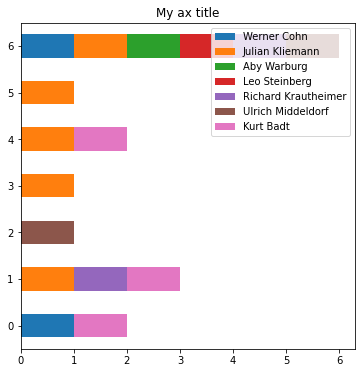

In [161]:
#Visualization of a stacked chart, representing the contribution of each historian to the various research field (historical periods of interest)
key_set = set()
key_global_occurrences = {}
for k,v in themes_dict.items():
    for x, y in global_occurrences.items():
        if v[0] == x:
            key_global_occurrences[k] = []
            key_global_occurrences[k].append(x)
            key_global_occurrences[k].append(y)

        
for k, v in global_occurrences.items():
    for j, y in v.items():
        key_set.add(j)

key_list = list(key_set)
dict_for_pd = {}

for k, v in key_global_occurrences.items():
    p = k
    p = []
    for i in key_list:
        count = 0
        if i in v[1]:
            count += v[1][i]
        p.append(count)
        dict_for_pd[v[0]] = p

df = pd.DataFrame(dict_for_pd)
ax = df.plot.barh(stacked=True);
ax.figure.set_size_inches(6,6)
ax.set_title("My ax title")
ax.legend(loc='upper right')

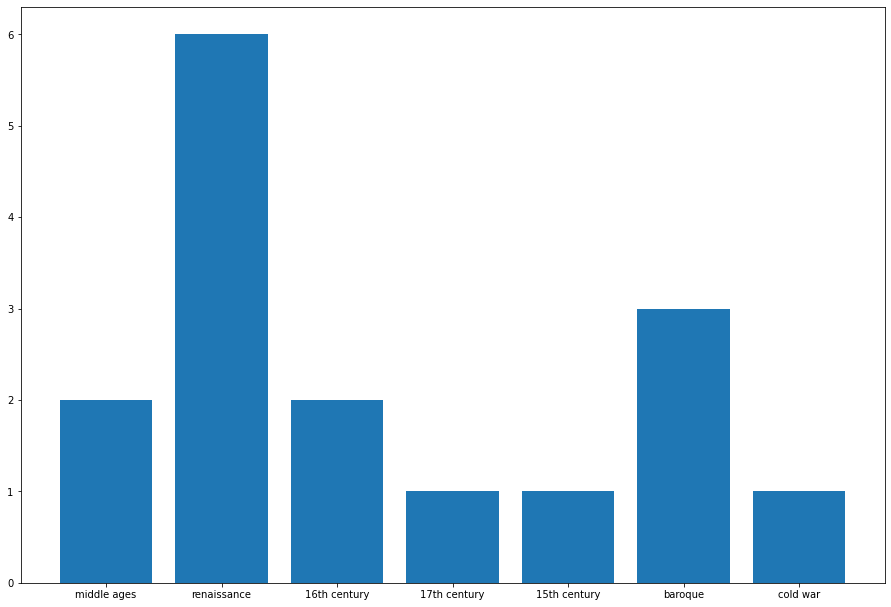

In [162]:
#Visualization of a simple barchart, representing the historical periods of interes and the number of collections dedicated to them, in order to visualize the overall distribution of the collections over themes of interest
total_occurrences = {}
for k, v in global_occurrences.items():
    for j, y in v.items():
        if j not in total_occurrences:
            total_occurrences[j] = y
        else:
            total_occurrences[j] += y
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])

object_periods = []
collections = []

for k,v in total_occurrences.items():
    object_periods.append(k)
    collections.append(v)

ax.bar(object_periods,collections)
plt.show()

## STEP 4: Links between people

In [163]:
#A first basic visualization of links between people that have a connection with the same university and share at least one period of interest. 
#These connections are represented with a simple chordgram.
#To realise this visualization, two preparatory lists containing matrices of co-occurrences of themes of interest between historians and historians names are prepared in advance.
from chord import Chord
matrix = []
names = []
for k,v in key_global_occurrences.items():
    names.append(v[0])
    l = []
    for y,x in key_global_occurrences.items():
        if k == y:
            l.append(0)
        else:
            count = 0
            for n in v[1]:
                if n in x[1]:
                    count +=1
            l.append(count)
    matrix.append(l)

print(matrix)
print(names)

Chord(matrix, names).show()


[[0, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 2, 1, 2], [1, 1, 0, 1, 1, 1, 0], [1, 1, 1, 0, 1, 1, 0], [1, 2, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 0, 0], [1, 2, 0, 0, 1, 0, 0]]
['Werner Cohn', 'Julian Kliemann', 'Aby Warburg', 'Leo Steinberg', 'Richard Krautheimer', 'Ulrich Middeldorf', 'Kurt Badt']


In [164]:
plot = Chord(matrix, names).to_html()

from IPython.display import IFrame

#the resulting chordgram is stored into an html file named 
IFrame(src="./out.html", width=700, height=700)

In [165]:
#In the next steps, we prepare a network between people, which is aimed at giving relevance also to other factors over the simple shared themes of interest, such as the overlapping between the periods in which they were active in the creation of their collections.
import numpy as np
import plotly.offline as py
import networkx as nx


cointerest_counts ={}
# Dictionary of dictionaries where each key is a person and the value is a dictionary with all other people as keys
# required data are mostly extracted from previously created data structures. 
for k,v in key_global_occurrences.items():
    cointerest_counts[v[0]] = {}
    for y,x in key_global_occurrences.items():
        if k != y: ####
            count = 0
            for i in key_list:
                if i in v[1].keys() and i in x[1].keys():
                    count +=1
            cointerest_counts[v[0]][x[0]] = count

interest_counts = {}
for k,v in key_global_occurrences.items():
    count = 0 
    for i in key_list:
        if i in v[1]:
            count += 1
    interest_counts[v[0]]= count


In [166]:
unilink = nx.Graph()
# a node is added to the created graph for each historian, with a size related to the number of themes he/she dealt with in his/her collections
for hist in interest_counts.keys():
    if interest_counts[hist] > 0:
        unilink.add_node(hist, size = interest_counts[hist])
# For each shared theme of interest between historians, an edge is added if its count is positive
for hist in cointerest_counts.keys():
    for co_hist in cointerest_counts[hist].keys():
        if cointerest_counts[hist][co_hist] > 0:
            unilink.add_edge(hist, co_hist, weight = cointerest_counts[hist][co_hist])

pos_ = nx.spring_layout(unilink)

resultEdges = []
resultNodes = []

for edge in unilink.edges():
    resultEdges.append(edge)

for node in unilink.nodes():
    resultNodes.append(node)

G=nx.DiGraph()

G.add_nodes_from(resultNodes)
G.add_edges_from(resultEdges)




In [167]:
cointerest_counts ={}
for k,v in key_global_occurrences.items():
    cointerest_counts[v[0]] = {}
    for y,x in key_global_occurrences.items():
        if k != y:
            count = 0
            for i in key_list:
                if i in v[1].keys() and i in x[1].keys():
                    count +=1
            cointerest_counts[v[0]][x[0]] = count

interest_counts = {}
for k,v in key_global_occurrences.items():
    count = 0 
    for i in key_list:
        if i in v[1]:
            count += 1
    interest_counts[v[0]]= count

In [168]:
#An initial weight to edges is added, which takes into account the only shared themes of interest between people, irrespective of the overlapping between their activity periods.
for e in G.edges():
    for k,v in cointerest_counts.items():
        if e[0] == k and e[1] in v.keys():
            G[e[0]][e[1]]['weight'] = v[e[1]]



In [169]:
#A first weight is added to node, which takes into account only the number of research periods of each historian
node_sizes=[]
for k,v in interest_counts.items():
    for n in G.nodes():
        if n == k:
            G.nodes[n]["weight"] = v
            node_sizes.append(v*1000) #the number is multiplied for 1000, so to make perciveable the different sizes of nodes in the visualization


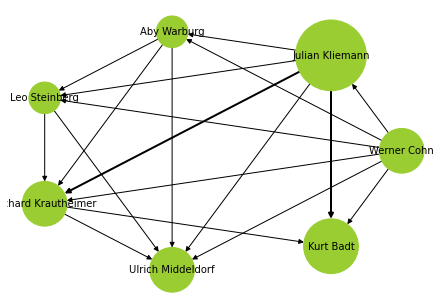

In [170]:
#Here the first version of the complete graph
pos = nx.circular_layout(G)
weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw(G, pos, width=weights, with_labels=True,font_size=10,node_color='yellowgreen',node_size = node_sizes)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.



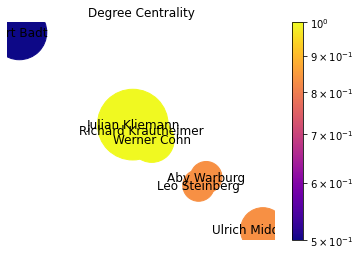

In [171]:
#Visualization of a simple heatmap, exploiting an existing function that allow the visual representation of the centrality of nodes in the network (without their edges)
import matplotlib.colors as mcolors

def draw_heatmap(G, pos, measures, measure_name):
  nodes = nx.draw_networkx_nodes(G, pos, node_size = node_sizes,
                                 cmap = plt.cm.plasma,
                                 node_color = list(measures.values()),
                                 nodelist=list(measures.keys()))
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
  edges = nx.draw_networkx_labels(G, pos)
  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis("off")
  plt.show()

pos = nx.spring_layout(G)
draw_heatmap(G, pos, nx.degree_centrality(G), "Degree Centrality", )

## STEP 5: Preparation of Wordclouds to represent collections and extraction of final data to refine the network

In [172]:
#Query about collections, to extract collections names, codes and data about their creators.
query_collections= g.query(
"""PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX art: <https://w3id.org/artchives/>
SELECT  ?collection ?coll_name ?person
WHERE {
?person rdf:type wd:Q5;
?p wd:Q152087.
FILTER (?p = wdt:P69 || ?p = wdt:P108 || ?p = wdt:P921).
?collection wdt:P170 ?person;
rdfs:label ?coll_name.

}

""")


#creation of a dictionary to store collected data
collections=dict()
for query in query_collections:
    collections[str(query[0])]= [str(query[1]).lstrip().lower(), query[2][31:]]

In [173]:
with open("artchives_output.nq", "r", encoding="utf8") as myfile:
    data = myfile.read().splitlines()
    print(data)

['<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <http://www.wikidata.org/prop/direct/P921> <http://www.wikidata.org/entity/Q5664> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <https://w3id.org/artchives/hasScopeAndContentSubject> <http://www.wikidata.org/entity/Q1404472> <https://w3id.org/artchives/1559665347-15/> .', '<http://www.wikidata.org/entity/Q49135> <http://www.w3.org/2000/01/rdf-schema#label> "              Isabella Stewart Gardner Museum"^^<http://www.w3.org/2001/XMLSchema#string> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <https://w3id.org/artchives/hasScopeAndContentSubject> <http://www.wikidata.org/entity/Q537874> <https://w3id.org/artchives/1559665347-15/> .', '<https://w3id.org/artchives/collectionjohn-popehennessy-papers> <http://www.wikidata.org/prop/direct/P921> <http://www.wikidata.org/entity/Q537874> <https://w3

In [174]:
#Reuse of data, so to read our nq file line by line and extract codes of the collections in archives from the contextual element in the triples.
#The code is aimed to be used in a request, in order to do some web scraping with BeautifulSoup and extract textual data from artchives pages devoted to the description of collections. 
#The so generated text files will be used in the creation of word clouds
import re

coll_dict={}
for query in query_collections:
    for line in data:
        if str(query[0]) in line:
            pattern = re.compile("\/[0-9]\d+-[0-9]\d+\/")
            a = re.findall(pattern, line)
            k= str(a)[3:-3]
            coll_dict[k] =[]
            coll_dict[k].append(str(query[0][27:]))
            coll_dict[k].append(str(query[2][31:]))

In [175]:
def collection_info(code):
    ur = "http://artchives.fondazionezeri.unibo.it/collection-"
    url = ur+code
    response = requests.get(url)
    #to extract information to add a dictionary to the coll_dict, so to identify start and end date of a collection (this pieces of information will be used also in the final version of our network)
    soup = BeautifulSoup(response.content)
    secTag0 = soup.find_all("section", {"class": "col-md-7"})
    for stag in secTag0:
        h3Tags = stag.find_all("h3", {"class": "articleSubtitle"})
        if len(h3Tags) > 0:
            for tag in h3Tags:
                if "Dates" in tag:
                    spanTags = stag.find_all("span")
                    for span in spanTags:
                        pattern = re.compile("[1-2]\d{3}-[1-2]\d{3}")
                        a = re.findall(pattern, str(spanTags))
                        for i in a:
                            i = i.lstrip().rstrip()
                        a = set(a)
    for k,v in coll_dict.items():
        if code == k:
            v.append(dict())
            for i in a:
                i = i.lstrip().rstrip()
                v[-1]["Start"] = i[:4]
                if len(i[:4])<4:
                    start = i[:4]
                    if start[0] == 8 or start[0] == 9:
                        start = "1"+start
                        v[-1]["Start"] = start
                    else:
                        start = "2"+start
                        v[-1]["Start"] = start
                v[-1]["End"] = i[-4:]
                if len(i[-4:])<4:
                    end = i[-4:]
                    if end[0] == 8 or end[0] == 9:
                        end = "1"+end
                        v[-1]["End"] = end
                    else:
                        end = "2"+end
                        v[-1]["End"] = end
                        
    #to produce the files to be used for the wordclouds
    secTag = soup.find_all("section", {"class": "info-note col-md-8"})
    secTag2 = soup.find_all("section", {"class": "columns"})
    secTag3 = soup.find_all("section")
    paraTag = soup.find_all("p", {"class": "info-url"})
    titletag = soup.find_all("h2", {"class": "articleTitle"})
    my_text=[]
    for title in titletag:
        my_text.append(title.text)
    for tag in secTag:
        pTags = tag.find_all("p")
        for tag in pTags:
            my_text.append(tag.text)
    for tag in secTag2:
        h3Tags = tag.find_all("h3", {"class": "articleSubtitle"})
        if len(h3Tags)> 0:
            pTags2 = tag.find_all("p")
            for tag in pTags2:
                my_text.append(tag.text)
    for tag in secTag3:
        h3Tags = tag.find_all("h3", {"class": "articleSubtitle"})
        if len(h3Tags) > 0:
            for tag in h3Tags:
                if "arrangement" in tag:
                    pTags3 = tag.find_all("p")
                    for tag in pTags3:
                        my_text.append(tag.text)
    for p in paraTag:
        my_text.append(p.text)
    #Creation of the text files for the wordclouds
    my_text= " ".join(my_text)
    return my_text


for k, v in coll_dict.items():
    file_name = v[0]
    file = open("wcloudstexts/" + file_name + ".txt","w")
    file.write(collection_info(k))
    file.close()

In [176]:
#Extrapolation of data related to the overlappings between activity periods, in order to refine weights in the network
activity_span=dict()
for k,v in coll_dict.items():
    key_set.add(v[1])
key_list=list(key_set)
for i in key_list:
    for k,v in coll_dict.items():
        if v[1] == i:
            if i not in activity_span:
                activity_span[i]=dict()
                activity_span[i]["Start"]=[]
                activity_span[i]["Start"].append(int(v[2]["Start"]))
                activity_span[i]["End"]=[]
                activity_span[i]["End"].append(int(v[2]["End"]))              

            else:
                activity_span[i]["Start"].append(int(v[2]["Start"]))
                activity_span[i]["End"].append(int(v[2]["End"]))


activity_tuple_dict=dict()
for k,v in key_global_occurrences.items():
    for i, j in activity_span.items():
        if k == i:
            activity_tuple_dict[v[0]]=(min(j["Start"]), max(j["End"]))


In [177]:
#Creation of a dictionary to store data about durations and overlapping between activity periods. In particular, each key represent a tuple (edge) of two historians, and the related value is a number which represet in proprtion the number of years in which both people were active in their careers.
coex_dict={}
for k,v in activity_tuple_dict.items():
    for x,y in activity_tuple_dict.items():
        if k != x:
            if v[0]>=y[0]:
                s=v[0]
            else:
                s=y[0]
            if v[1]<=y[1]:
                e=v[1]
            else:
                e=y[1]
            if e-s <= 0:
                coex = 0
            else:
                coex = e-s
            w = coex /10 # the number is divided in order to mantain a proportion with the weight given to the common topics of interest
            coex_dict[(k,x)] = w
             

In [178]:
#update the weight of the edges
for e in G.edges():
    for k,v in cointerest_counts.items():
        if e[0] == k and e[1] in v.keys():
            G[e[0]][e[1]]['weight'] = v[e[1]]
#check 1
for e in G.edges():
    print(G.get_edge_data(e[0],e[1]))
    
    
for e in G.edges():
    for y,x in coex_dict.items():
        if e == y:
            G[e[0]][e[1]]['weight'] += x #adding the value of the co-existence of careers to the value of shared periods of interest
#check 2
for e in G.edges():
    print(G.get_edge_data(e[0],e[1]))

{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 2}
{'weight': 1}
{'weight': 2}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1}
{'weight': 1.0}
{'weight': 1.0}
{'weight': 2.5}
{'weight': 2.7}
{'weight': 3.9}
{'weight': 2.2}
{'weight': 1.0}
{'weight': 2.6}
{'weight': 4.3}
{'weight': 1.1}
{'weight': 2.0}
{'weight': 1.0}
{'weight': 1.0}
{'weight': 1.2}
{'weight': 6.1}
{'weight': 4.6}
{'weight': 4.8}
{'weight': 1.6}


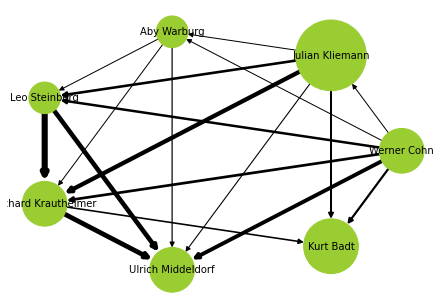

In [179]:
pos = nx.circular_layout(G)

weights = [G[u][v]['weight'] for u,v in G.edges()]

nx.draw(G, pos, width=weights, with_labels=True,font_size=10,node_color='yellowgreen',node_size = node_sizes)

In [180]:
#Here it is proposed again the same code used to assign weights to nodes in the first step of this process, but values are now updated with values that take into account also the duration of the active career of each historian (data are, as alway, derived from their collections)
for k,v in interest_counts.items():
    for n in G.nodes():
        if n == k:
            G.nodes[n]["weight"] = v
            node_sizes.append(v*1000)
print(node_sizes)

#here we go to update the dimension of node, calculating the length of time of activity over the total time-span covered by all the collections

start_list=[]
end_list=[]

for k,v in activity_tuple_dict.items():
    start_list.append(v[0])
    end_list.append(v[1])

total_timespan = max(end_list) - min(start_list)
print(total_timespan)

node_sizes=[]
#svoto la lista dei pesi dei nodi fatta precedentemente e la riempo nuovamente con i valori aggiornati
for k,v in activity_tuple_dict.items():
    activity_period= v[1]-v[0]
    for n in G.nodes():
        if n == k:
            G.nodes[n]["weight"] += activity_period/total_timespan #update previous values
            i = G.nodes[n]["weight"]
    node_sizes.append(i*1000)
print(node_sizes)


[2000, 5000, 1000, 1000, 2000, 2000, 3000, 2000, 5000, 1000, 1000, 2000, 2000, 3000]
112
[2258.9285714285716, 5312.5, 1214.2857142857142, 1455.357142857143, 2535.714285714286, 2500.0, 3107.1428571428573]


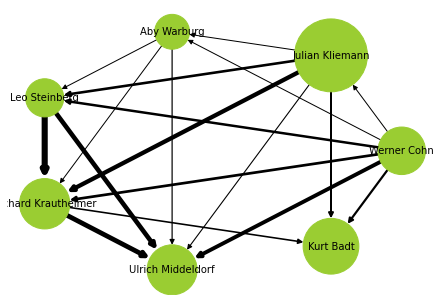

In [181]:
nx.draw(G, pos, width=weights, with_labels=True,font_size=10,node_color='yellowgreen',node_size = node_sizes)

In [182]:
#CSV files creation, to be used in the 3DJS visualizations
triples_as_list = list()
triples_as_list.append("source,target,weight\n")
for e in G.edges():
    source = str(e[0]).strip().replace("\n", "")
    target = str(e[1]).strip().replace("\n", "")
    weight = str(G.get_edge_data(e[0],e[1])["weight"]).strip().replace("\n", "")
    triple_as_str = source + "," + target + "," + weight + "\n"
    triples_as_list.append(triple_as_str)

import io
with io.open("edge_1list.csv", "w", encoding="utf-8") as writer:
    # dict_writer.writerows(triples_as_list)
    for line in triples_as_list:
        writer.write(line)
        
triples_as_list = list()
triples_as_list.append("id\n")
for g in G.nodes():
    id = str(g).strip().replace("\n", "")
    triple_as_str = id+ "\n"
    triples_as_list.append(triple_as_str)

with io.open("node_list.csv", "w", encoding="utf-8") as writer:
    for line in triples_as_list:
        writer.write(line)

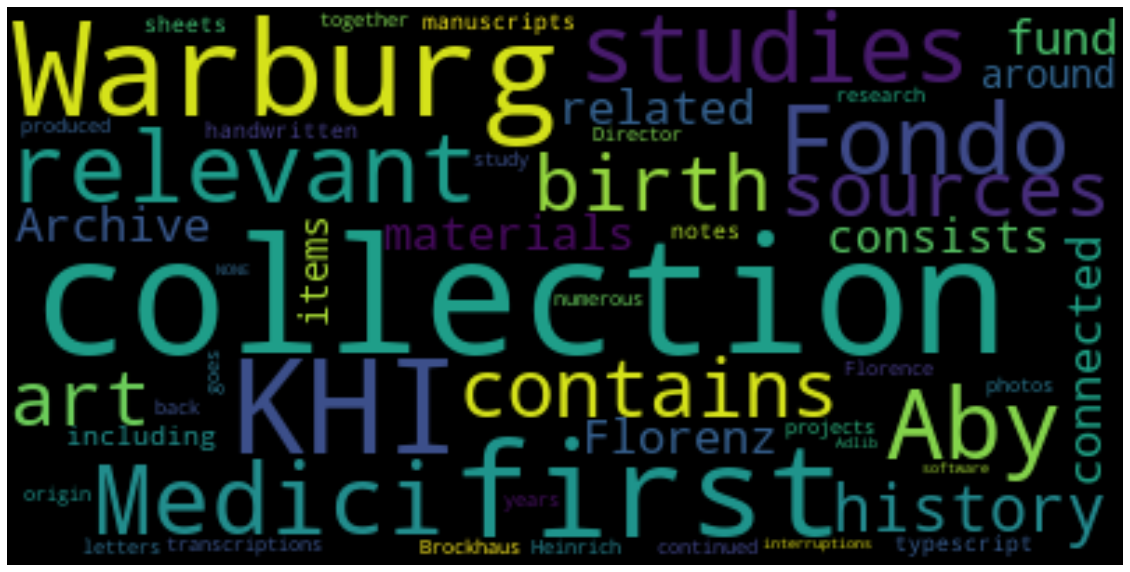

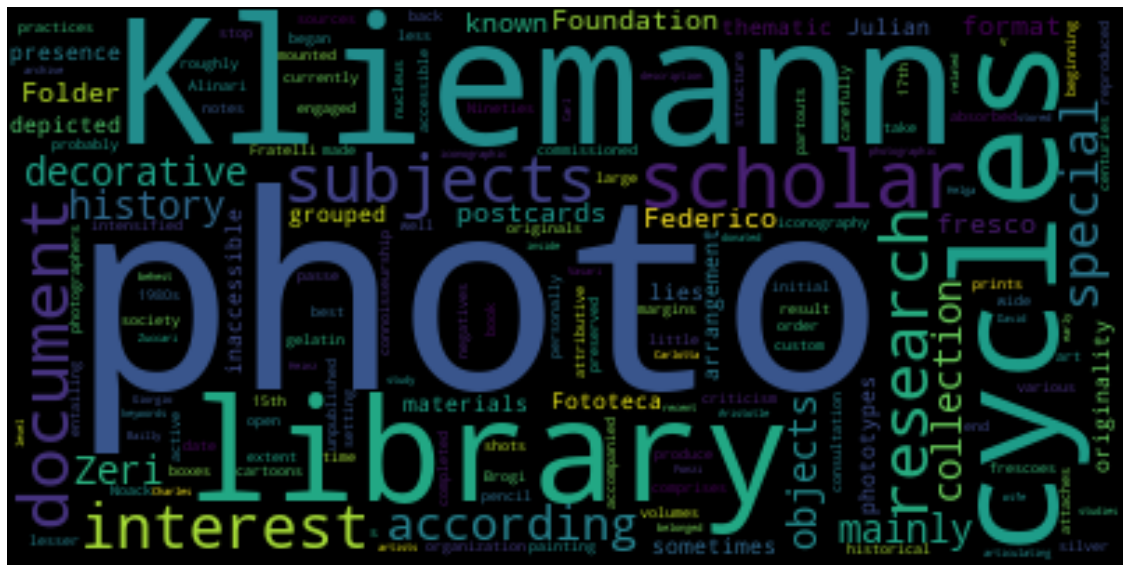

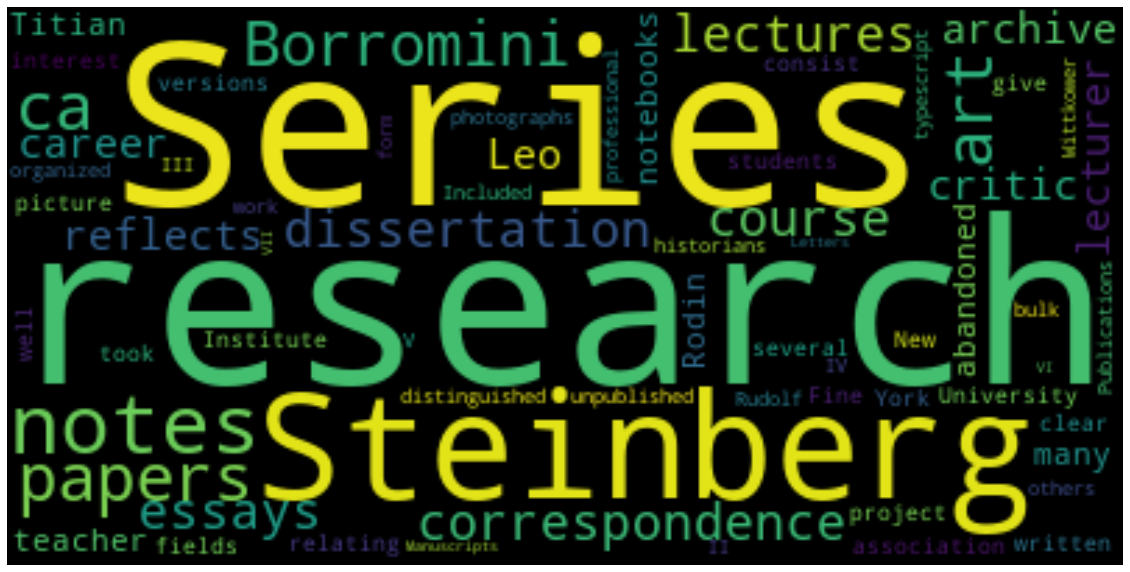

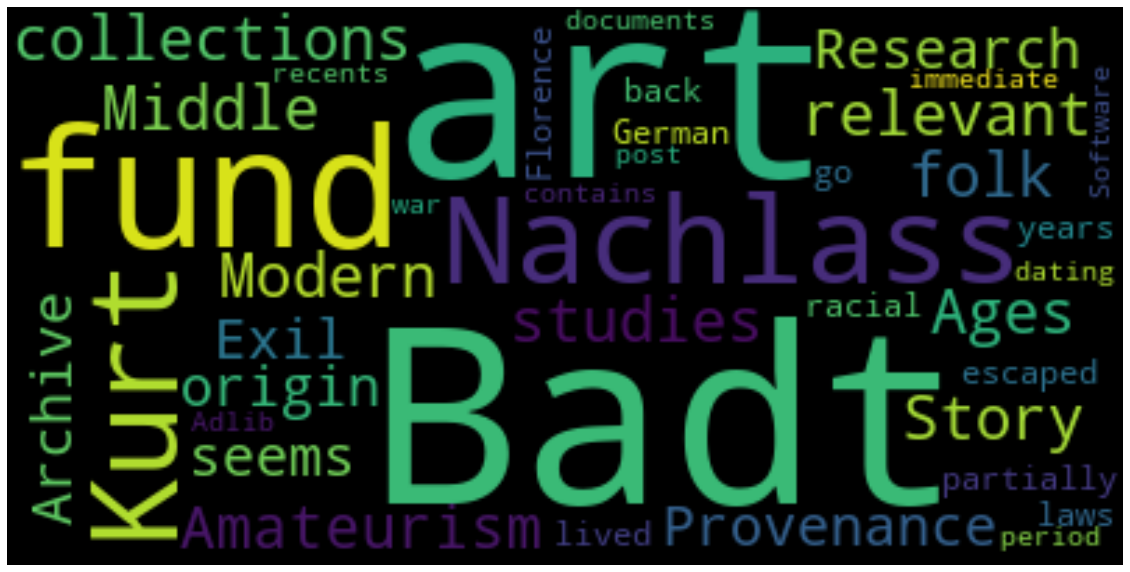

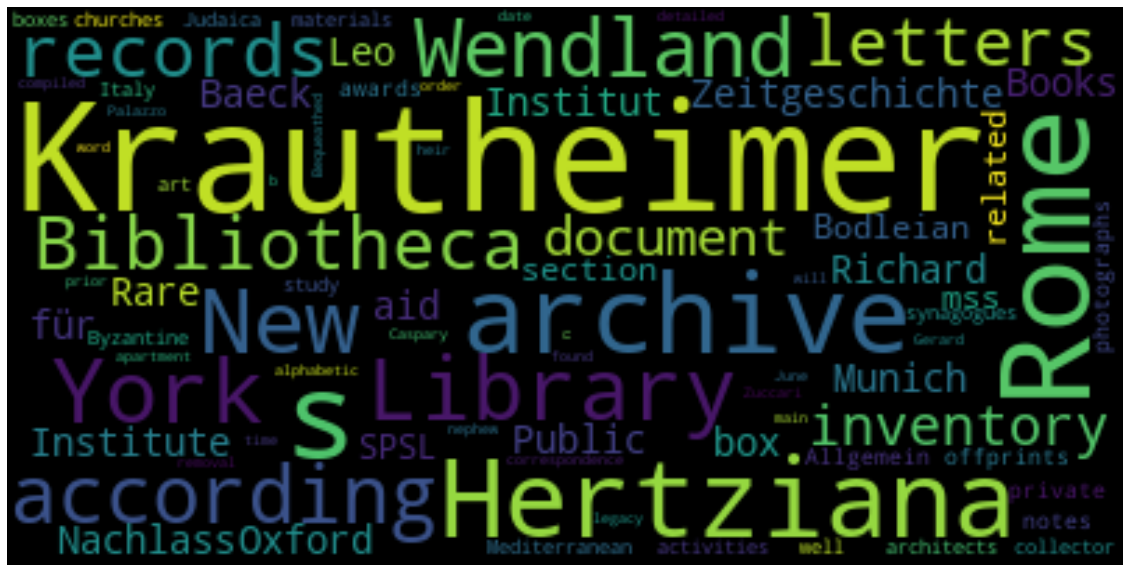

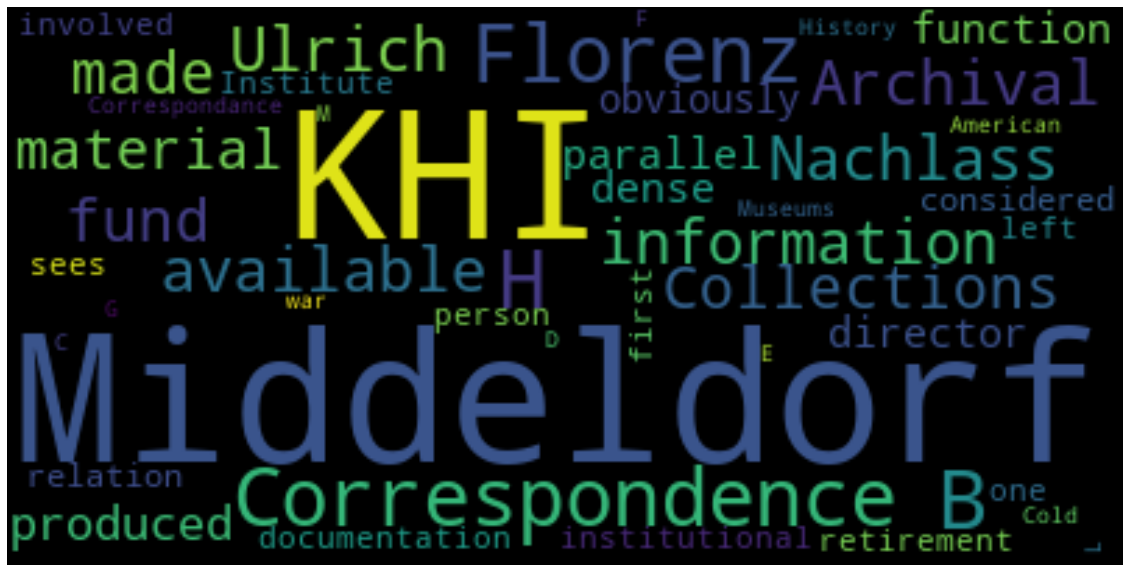

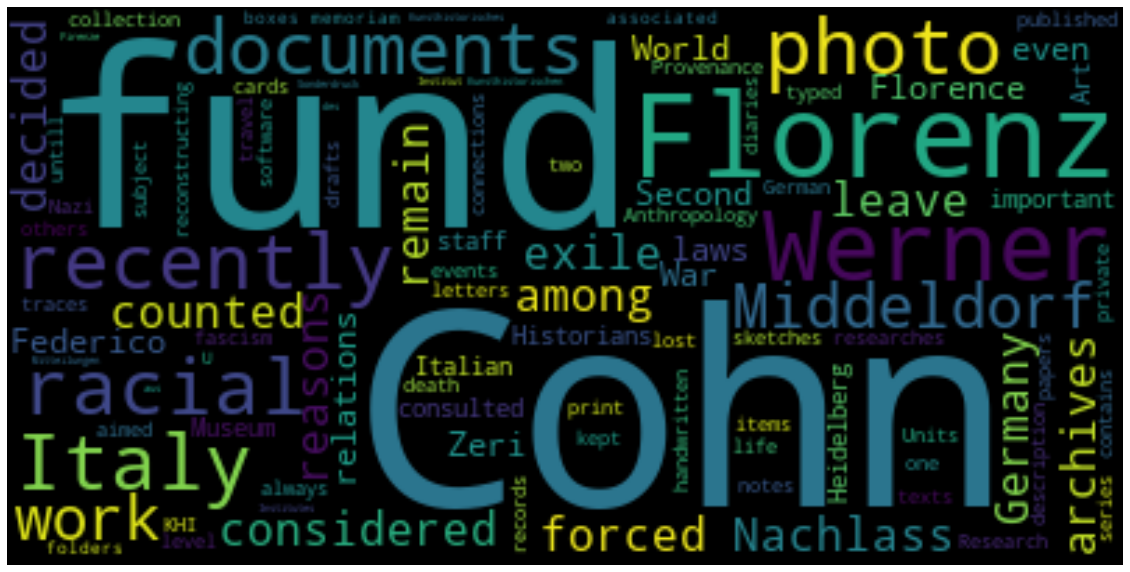

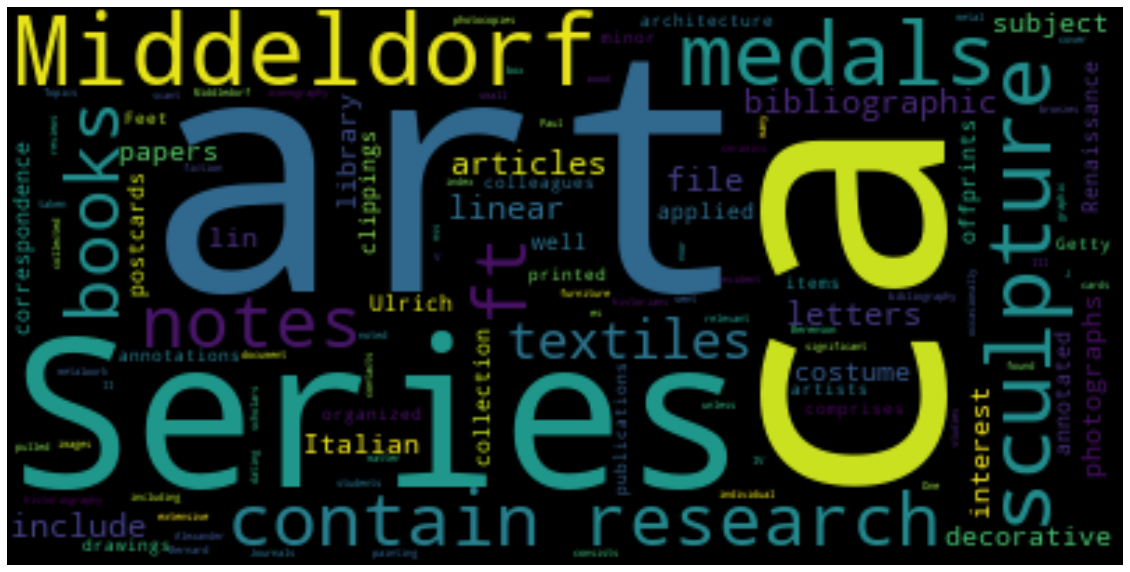

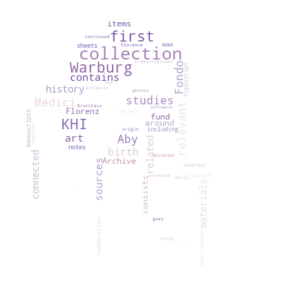

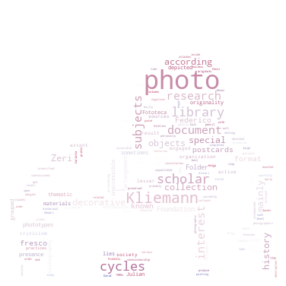

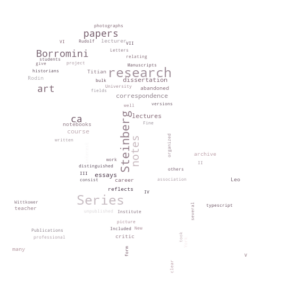

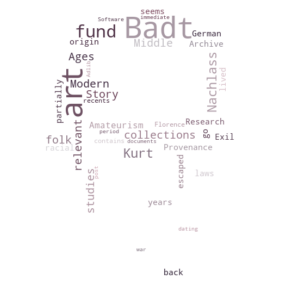

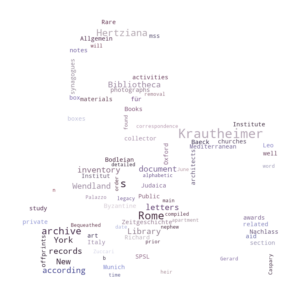

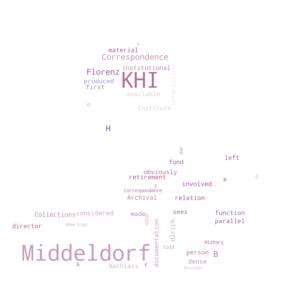

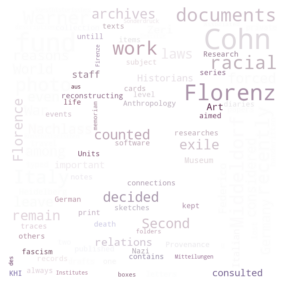

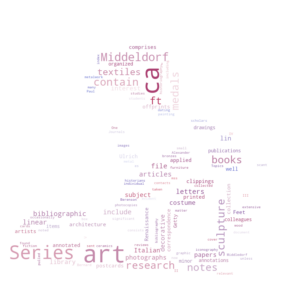

In [183]:
#WordClouds visualization of the collections. The two different functions produce two kinds of visualizations.
#In fact, while the first functions only takes in input the text file generated by using information extracted from artchives with BS, the second one takes in input also one image, which is used to shape the wordcloud.

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


def create_wc_basic(file):
    f = open(file, "r")
    t = str(f.read())
    stopwords = set(STOPWORDS)
    # Create a word cloud image
    wc = WordCloud(background_color="black", max_words=1000,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')
    # Generate a wordcloud
    wc.generate(t)
    # store to file
    wc.to_file("wcloudstexts/img/" + file[17:-4] +".png")
    # show
    plt.figure(figsize=[20,20])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

from pathlib import Path

#iterate over a folder
pathlist = Path("wcloudstexts").rglob('*.txt')
for path in pathlist:
    path_in_str = str(path)
    create_wc_basic(path_in_str)
    

def create_wc(file,img):
    f = open(file, "r")
    t = str(f.read())
    stopwords = set(STOPWORDS)
    # Create a word cloud image
    mask = np.array(Image.open(img))
    wordcloud_usa = WordCloud(stopwords=stopwords,max_font_size=70, background_color="white", mode="RGBA", max_words=1500, mask=mask).generate(t)
    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[5,5])
    plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.savefig("wcloudstexts/img2/" + file[17:-4] +".png", format="png")
    plt.show()


pathlist = Path("wcloudstexts").rglob('*.txt')
for path in pathlist:
    path_in_str = str(path)
    for k,v in coll_dict.items():
        if v[0] in path_in_str:
            my_img = "wcloudstexts\drawings/" + v[1] + ".jpg" 
    create_wc(path_in_str, my_img)